Técnicas de Aprendizaje Automático -- Almudena Ruiz-Iniesta

# Tema 3: Datos ausentes y normalización

Describir los datos, caracterizarlos, entenderlos y transformarlos para poder utlizarlos en un modelo de aprendizaje automático, es una tarea fundamental. En el Tema 2, hemos aprendido a describir los datos para entender qué podemos aprender de ellos. En este tema se presentan las técnicas para seleccionar las mejores variables para el aprendizaje y adaptar los datos para su uso posterior.

## Problema. Faltan datos, ¿qué se puede hacer?


In [1]:
import pandas as pd

df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Atributos redundantes

Son aquellos atributos que aportan la misma información por lo tanto, podemos reducir la complejidad de nuestro modelo quedándonos con uno de ellos.

### Correlación



In [2]:
columns_to_drop = ['Name','Ticket','Cabin']
df.drop(columns_to_drop, inplace=True, axis=1)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [4]:
# Iterar sobre cada columna del DataFrame
for columna in df.columns:
    # Obtener los diferentes valores únicos de la columna
    valores_unicos = df[columna].unique()
    # Imprimir los valores únicos de la columna
    print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Valores únicos en la columna 'PassengerId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 23

In [5]:
# transformamos los valores de male, female en float
df["Sex"]=df["Sex"].map({'female':1,'male':0})
df["Embarked"]=df["Embarked"].map({"S":0,"C":1,"Q":2})

<Axes: >

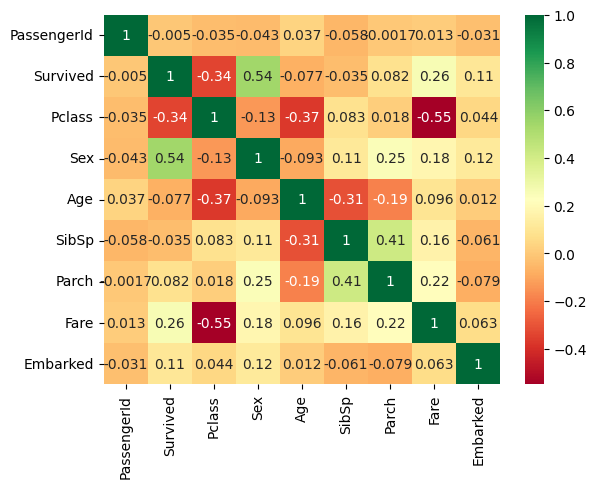

In [6]:
import seaborn as sns
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")   


## Datos ausentes

- Los valores ausentes son valores para atributos que no se introdujeron o se 
perdieron en el proceso de registr.
- Los valores ausentes en el 
análisis puede introducir sesgos y dar lugar a que se extraigan conclusione 
engaños.

Hay que tomar una decisión siempre sobre los datos ausentes:
- Eliminación
- Imputación

aso

In [7]:
# ¿existen datos ausentes en nuestro dataset?

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


**¿Se pueden eliminar los datos ausentes?**

- Cantidad de datos ausentes: Si solo hay unos pocos valores faltantes en comparación con el tamaño total del conjunto de datos, eliminar esos registros generalmente no debería afectar significativamente el rendimiento del modelo.

Impacto en la calidad de los datos: Antes de eliminar los datos ausentes, es importante evaluar si su eliminación introducirá sesgos o afectará la representatividad de los datos restantes. Si la eliminación de los datos ausentes altera la distribución de las características o la relación entre las variables, podría conducir a modelos menos precisos o sesgado
- 

Tipo de datos ausentes: Si los datos faltantes están distribuidos aleatoriamente y no hay un patrón discernible, eliminarlos podría ser una opción razonable. Sin embargo, si hay un patrón sistemático en los datos faltantes, como que ciertos grupos de personas tienden a no proporcionar ciertos tipos de información, entonces eliminarlos podría introducir sesgos en el modo.

Tamaño del conjunto de datos: Si eliminar los datos ausentes dejaría el conjunto de datos demasiado pequeño para entrenar un modelo efectivo, entonces podrías considerar técnicas de imputación para estimar valores para los datos faltantes en lugar de eliminarlos.

In [10]:
(df.isnull().sum())/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [11]:
(df['Age'].isnull().sum()) / len(df['Age'])

np.float64(0.19865319865319866)

**Imputación de valores**

Media, mediana y moda, son métodos frecuentes de imputación de valores.

Al igual que antes de eliminar registros había que estudiar cómo afectaría a los datos, con la imputación de valores pasa lo mismo.

¿Podemos imputar con la media/mediana o moda Age?

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Sex
0    30.726645
1    27.915709
Name: Age, dtype: float64


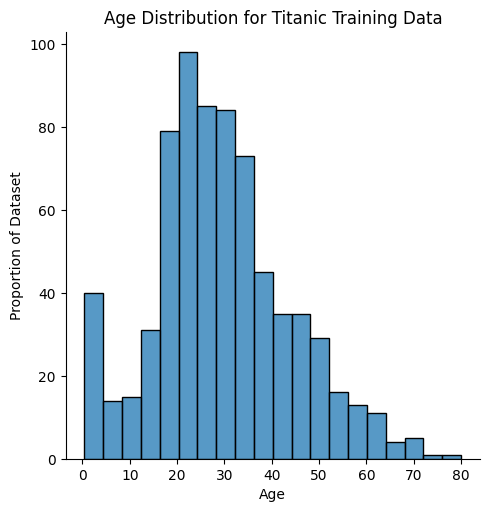

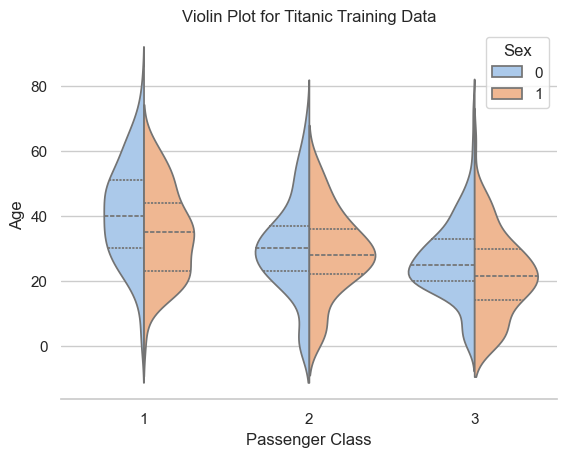

In [12]:
import matplotlib.pyplot as plt

# Describimos la distribución de edad sin los datos ausentes
dfage = df.Age.dropna()
print(dfage.describe())
print(df.groupby(['Sex'])['Age'].mean())

# Visualización
sns.displot(dfage)
plt.title('Age Distribution for Titanic Training Data')
plt.ylabel('Proportion of Dataset')
plt.show()

# violinplot
sns.set(style="whitegrid", palette="pastel", color_codes=True)
df['Gender'] = df['Sex'].map({1 : 'Female', 0 : 'Male'})
plt.title('Violin Plot for Titanic Training Data')
sns.violinplot(x="Pclass", y="Age", hue="Sex", data=df, split=True,
               inner="quartile")
sns.despine(left=True)
plt.xlabel('Passenger Class')
plt.show()

In [13]:
# Analizamos cómo son los datos ausentes para ver si encontramos algún patrón
missing_values = df[df['Age'].isnull()]
print("% Female missing data: ")
print(missing_values['Sex'].mean())
print('% survival missing data: ') 
print(missing_values['Survived'].mean())
print('mean passenger class: ')
print(missing_values['Pclass'].mean())

% Female missing data: 
0.2994350282485876
% survival missing data: 
0.2937853107344633
mean passenger class: 
2.598870056497175


Arriba vemos estadísticas resumidas y una visualización de la distribución por edades del conjunto de datos. Vemos una distribución algo bimodal con un pico para niños y otro pico para adultos. Los datos muestran que las mujeres en todas las clases eran generalmente más jóvenes que sus homólogos masculinos a bordo del Titanic, y que los pasajeros de primera clase eran generalmente mayores que los de tercera clase. 

Los datos que faltan pertenecen principalmente a pasajeros varones de tercera clase, que tenían una tasa de supervivencia más baja que la población general. Debido a esto, nuestra estrategia de imputación tomará en consideración las categorías, en lugar de utilizar la edad media general.

In [14]:
# Imputaciónp or la media pero teniendo en cuenta las variables de Pclass y Sex.
df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)
print(df['Age'][df['Age'].isnull()])

# Añadimos una nueva variable para diferenciar si el pasajero un niño (umbral en 16)
df['Child'] = df['Age']<16
df['Child'] = df['Child'].astype(int)

Series([], Name: Age, dtype: float64)


/var/folders/hk/hc_3jxjx6l3_q31yrc71m_sw0000gn/T/ipykernel_4727/1609412639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)


In [15]:
df.drop('Gender',inplace=True, axis=1)

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.067485
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.108669
Child          0.136107
Name: Survived, dtype: float64


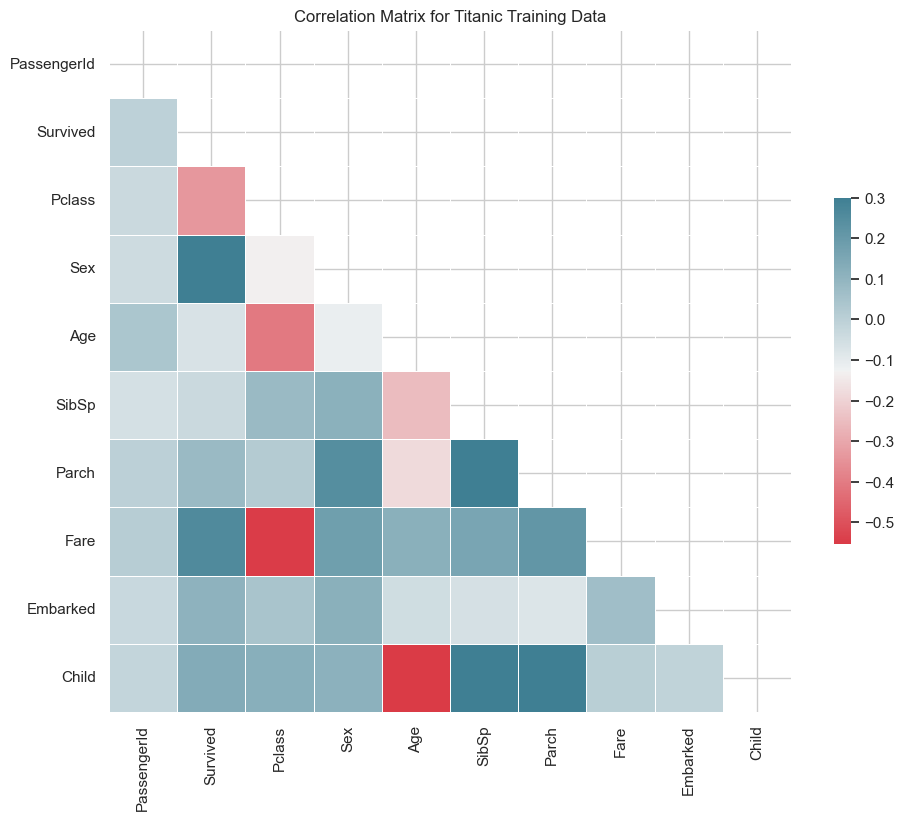

In [16]:
import numpy as np

corr = df.corr()
print(corr['Survived'])
# Máscara para la diagonal superior
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation Matrix for Titanic Training Data')
plt.show()

Arriba se genera una representación gráfica de la matriz de correlación para las variables en el conjunto de datos. Impresos también vemos los coeficientes de correlación entre la supervivencia (1 o 0) y otras variables en el conjunto de datos. 
Vemos que las tres variables con mayor correlación con la supervivencia son la edad, el sexo y la clase. Dado que la tarifa y la clase están tan correlacionadas, en aras de la simplicidad sólo deberíamos considerar una en nuestro análisis. También vemos que la edad general no es tan importante como tener menos de 16 años.

Por lo tanto, concluimos que las variables de particular interés para nuestro análisis son la edad, el sexo y la claro.